In [12]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('cleaned_features.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Public speaking,Movies,Thriller,Comedy,Documentary,Fantasy/Fairy tales,Action,...,Gender,Finances,Spending on looks,Age,Weight,Number of siblings,Education,Spending on gadgets,Height,Happiness in life
0,0,0,0,5.0,5.0,2.0,5.0,3.0,5.0,2.0,...,female,3.0,3.0,20.0,48.0,1.0,1.0,1,163.0,4.0
1,1,1,1,4.0,5.0,2.0,4.0,4.0,3.0,4.0,...,female,3.0,2.0,19.0,58.0,2.0,1.0,5,163.0,4.0
2,2,2,2,2.0,5.0,4.0,4.0,2.0,5.0,1.0,...,female,2.0,3.0,20.0,67.0,2.0,2.0,4,176.0,4.0
3,3,3,3,5.0,5.0,4.0,3.0,5.0,1.0,2.0,...,female,2.0,4.0,22.0,59.0,1.0,1.0,4,172.0,2.0
4,4,4,4,5.0,5.0,4.0,5.0,3.0,4.0,4.0,...,female,4.0,3.0,20.0,59.0,1.0,2.0,2,170.0,3.0


In [14]:
female = df[df['Gender'] == 'female']
male = df[df['Gender'] == 'male']


In [15]:
#Fill na values with the mean
female.loc[:,['Height', 'Weight']] = female[['Height', 'Weight']].fillna(female.mean())
male.loc[:,['Height', 'Weight']] = male[['Height', 'Weight']].fillna(male.mean())

df2 = pd.concat([female,male])

Text(0.5, 0, 'Height (cm)')

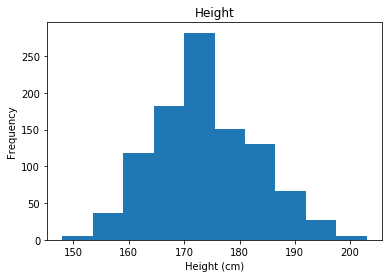

In [16]:
#Let's plot to try to find outliers
df2['Height'].plot(kind = 'hist')
plt.title('Height')
plt.xlabel("Height (cm)")

In [6]:
#There is 1 row with an abnormally height but a normal looking weight.Let's fill it by looking at the weight by others in her range

weight = df2[(df2['Weight'] >54) & (df2['Weight'] < 56)]
df2.loc[df2['Height'] < 140, 'Height']=  weight['Height'].mean()


Text(0.5, 0, 'Height (cm)')

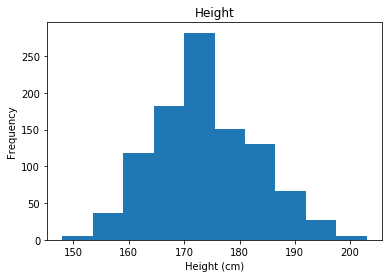

In [7]:
#rechecking
df2['Height'].plot(kind = 'hist')
plt.title('Height')
plt.xlabel("Height (cm)")

Text(0.5, 0, 'Height (cm)')

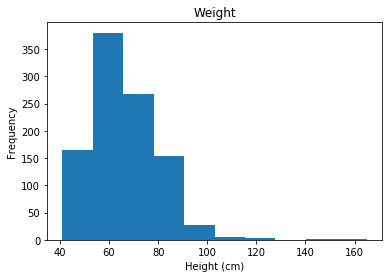

In [8]:
df2['Weight'].plot(kind = 'hist')
plt.title('Weight')
plt.xlabel("Height (cm)")

In [9]:
df2.loc[df2['Weight'] > 120]
#could be a mistake or maybe not so leaving as is.

,Unnamed: 0,Unnamed: 0.1,Public speaking,Movies,Thriller,Comedy,Documentary,Fantasy/Fairy tales,Action,Music,...,Gender,Finances,Spending on looks,Age,Weight,Number of siblings,Education,Spending on gadgets,Height,Happiness in life
520,885,885,2.0,4.0,4.0,4.0,3.0,4.0,2.0,3.0,...,female,2.0,4.0,23.0,165.0,0.0,2.0,4,173.514141,4.0
939,859,859,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,...,male,2.0,5.0,20.0,125.0,1.0,2.0,4,190.000000,4.0
996,992,992,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,male,1.0,1.0,30.0,150.0,1.0,4.0,1,200.000000,2.0


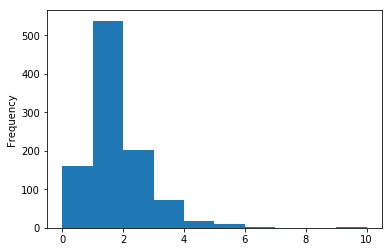

In [10]:
#checking for outliers in number of siblings
df['Number of siblings'].plot(kind = 'hist')


In [11]:
df2.to_csv('cleaned_features.csv')